In [2]:
import pandas as pd

# Load the enriched dataset from Day 2
data = pd.read_csv("../data/AAPL_enriched.csv", index_col=0, parse_dates=True)
data.head()


,Open,High,Low,Close,Volume,SMA_10,SMA_50,SMA_200,Volatility_30,RSI_14,BB_MID,BB_UPPER,BB_LOWER,ATR_14
Price,,,,,,,,,,,,,,
2024-10-16,230.527109,231.044690,228.775253,230.706268,34082200.0,227.241415,223.593807,198.110703,0.014182,57.519396,227.021934,232.629377,221.414490,4.400949
2024-10-17,232.348639,232.766707,229.452131,231.074570,32993800.0,227.886414,224.043167,198.345669,0.014147,58.005551,227.185175,233.072297,221.298052,4.479868
2024-10-18,235.085888,235.085888,232.925942,233.911362,46431500.0,228.702612,224.479866,198.601710,0.014184,61.646369,227.523599,234.134208,220.912991,4.395970
2024-10-21,233.363911,235.752803,233.363911,235.384506,36254500.0,230.174759,224.887767,198.876718,0.014199,63.419961,228.021780,235.419994,220.623567,3.908241
2024-10-22,232.806535,235.125743,231.522517,234.767410,38846600.0,231.179086,225.252670,199.152260,0.014186,62.123980,228.444315,236.378386,220.510244,3.874823


In [3]:
#Rules - Buy when SMA_10 crosses above SMA_50. Sell when SMA_10 crosses below SMA_50.

data["Signal"] = 0
data.loc[data["SMA_10"] > data["SMA_50"], "Signal"] = 1
data.loc[data["SMA_10"] < data["SMA_50"], "Signal"] = -1

# Shift to represent next-day position (avoid lookahead bias)
data["Position"] = data["Signal"].shift(1).fillna(0)


In [4]:
# Daily returns
data["Return"] = data["Close"].pct_change()

# Strategy returns
data["Strategy_Return"] = data["Position"] * data["Return"]


In [5]:
import numpy as np

cumulative_return = (1 + data["Strategy_Return"]).cumprod()
sharpe_ratio = np.sqrt(252) * data["Strategy_Return"].mean() / data["Strategy_Return"].std()
max_drawdown = (cumulative_return / cumulative_return.cummax() - 1).min()

print(f"Cumulative Return: {cumulative_return.iloc[-1]:.2f}x")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"Max Drawdown: {max_drawdown:.2%}")


Cumulative Return: 1.01x
Sharpe Ratio: 0.35
Max Drawdown: -8.67%


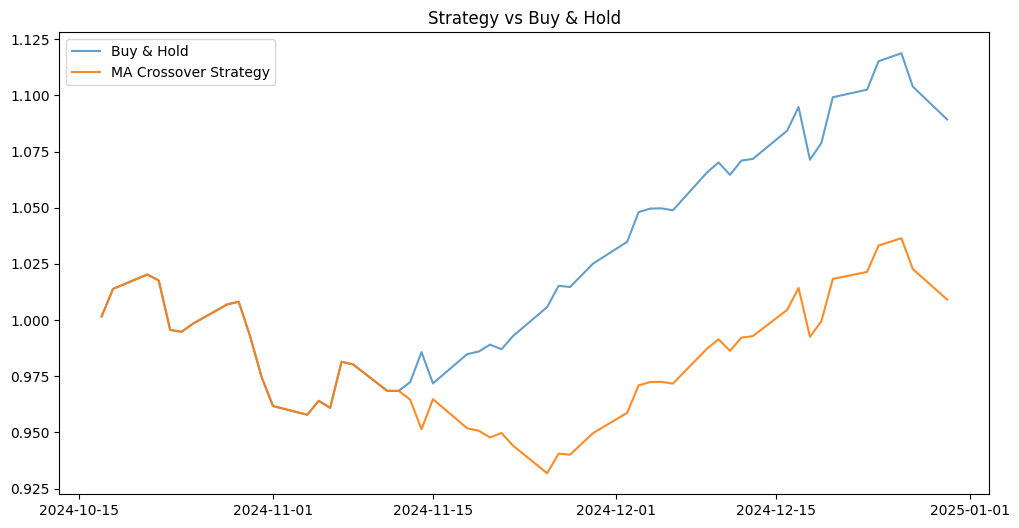

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot((1 + data["Return"]).cumprod(), label="Buy & Hold", alpha=0.7)
plt.plot((1 + data["Strategy_Return"]).cumprod(), label="MA Crossover Strategy", alpha=0.9)
plt.title("Strategy vs Buy & Hold")
plt.legend()
plt.show()


In [7]:
# Save enriched backtest dataset
data.to_csv("../data/AAPL_backtest.csv")

# Save cumulative returns separately
cumulative_return.to_csv("../data/AAPL_cumulative_return.csv")
print("Saved backtest results to /data/")


Saved backtest results to /data/
